<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Open-the-data-file-and-study-the-general-information." data-toc-modified-id="Open-the-data-file-and-study-the-general-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open the data file and study the general information</a></span></li><li><span><a href="#Preprocessing-data" data-toc-modified-id="Preprocessing-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing data</a></span></li><li><span><a href="#Count-and-add-new-columns-to-the-table" data-toc-modified-id="Count-and-add-new-columns-to-the-table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Count and add new columns to the table</a></span></li><li><span><a href="#Conduct-a-research-analysis-of-the-data" data-toc-modified-id="Conduct-a-research-analysis-of-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conduct a research analysis of the data</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Research of ads for the sale of apartments

At your disposal are the data of the Yandex Mobility service — an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your task is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and reservoir.

### Open the data file and study the general information. 

In [7]:
# 1. Upload the data from the file to the dataframe.
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
data['floors_total'].isna().value_counts()

False    23613
True        86
Name: floors_total, dtype: int64

In [9]:
# 2. Study the general information about the received dataframe.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

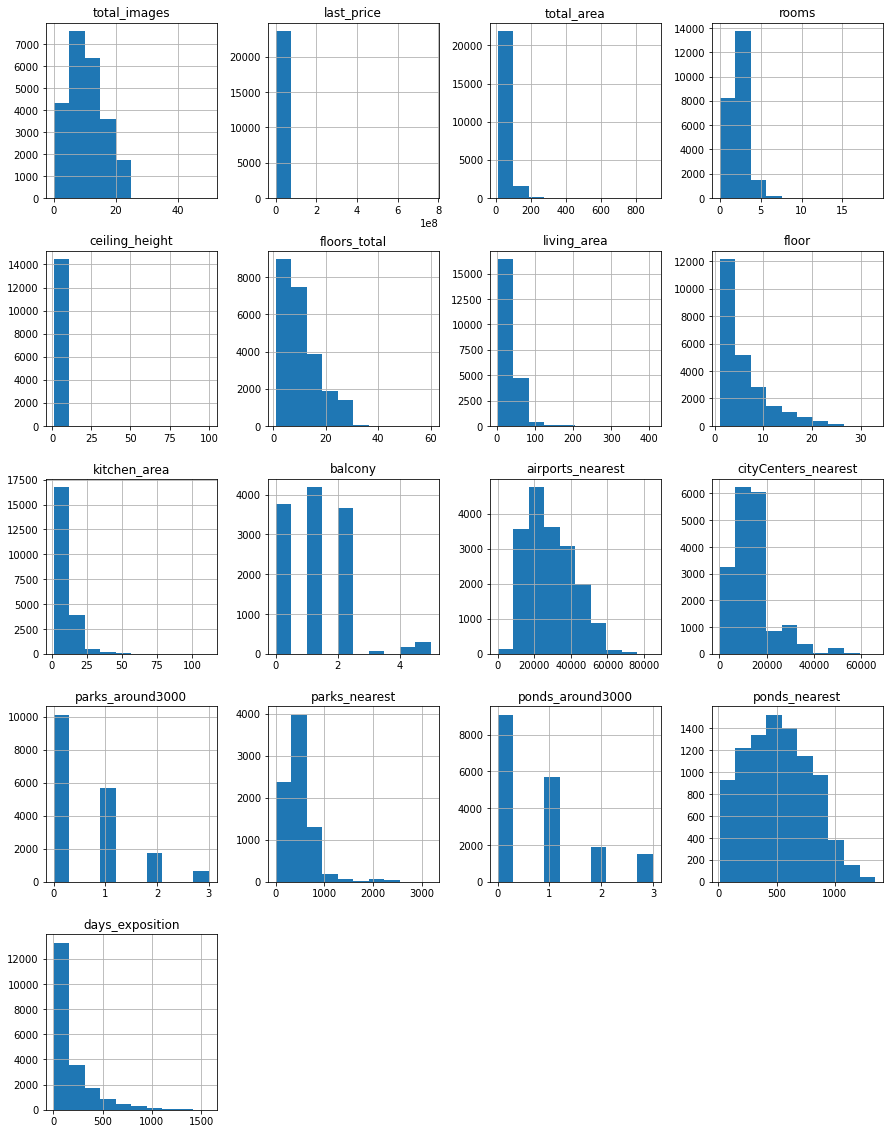

In [10]:
# 3. Build a common histogram for all columns of the table.
data.hist(figsize=(15, 20));

Conclusion: the dataframe has 22 columns and 23699 rows. There are gaps in a number of columns, some of which should be eliminated at the preprocessing stage. It is also advisable to change the data types of columns with quantitative indicators from float to int, and the data type of a column with dates to the datetime data type.

### Data preprocessing

In [11]:
# 1. Find and examine the missing values in the columns.

# Let's check the number of gaps in each column of the dataframe:
print(data.isna().sum())    

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [12]:
# Replace the gaps in the "ceiling height" column with the median value:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data.isna().sum())
display(data.head(10))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [13]:
# Replace the gaps in the "number of floors" column with the median value:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
print(data.isna().sum())
display(data.head(10))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [14]:
# Let's check whether, as a result of the replacement, the floor of the apartment 
# has become larger (higher) than the number of floors of the house:
print(len(data.loc[data['floor'] > data['floors_total']]))

37


Conclusion: the floor of the apartment exceeds the maximum number of floors of the house in 37 apartments. 

In [15]:
# For apartments whose floor exceeds the maximum number of storeys of the house, 
# we will replace the floor with the last floor of the maximum number of storeys:
data.loc[data['floor'] > data['floors_total'], 'floor'] = data['floors_total']
print(data.loc[data['floor'] > data['floors_total']])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


In [16]:
# Replace the gaps in the "living area" column with a coefficient equal to the ratio of the average
# area of apartments for which there are no gaps in the living area to the average value of the living area of apartments
# for which there are also no gaps.
# Find the coefficient:
k_gilaya = data.loc[data['living_area'] != 'NaN', 'total_area'].mean()/(data['living_area'].mean())
# print(k_gilaya)
# Let's divide the total area of apartments that have gaps in the living area by the coefficient:
data['living_area'] = data['living_area'].fillna(data['total_area']/k_gilaya)
print(data.isna().sum())
display(data.head(10))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8.0,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1.0,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4.0,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.785766,9.0,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13.0,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5.0,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6.0,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.882144,22.0,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26.0,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7.0,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [17]:
# Replace the gaps in the "kitchen area" column in the same way as replacing the living area:
k_kuhnya = data.loc[data['kitchen_area'] != 'NaN', 'total_area'].mean()/(data['kitchen_area'].mean())
# print(k_kuhnya)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']/k_kuhnya)
print(data.isna().sum())
display(data.head(10))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8.0,NaN,...,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1.0,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4.0,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.785766,9.0,NaN,...,27.848168,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13.0,NaN,...,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5.0,NaN,...,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6.0,NaN,...,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.882144,22.0,NaN,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26.0,NaN,...,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7.0,NaN,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [18]:
# Replace the gaps in the column "number of balconies" with zero:
data['balcony'] = data['balcony'].fillna(0)
print(data.isna().sum())
display(data.head(10))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8.0,NaN,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1.0,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4.0,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.785766,9.0,NaN,...,27.848168,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13.0,NaN,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5.0,NaN,...,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6.0,NaN,...,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.882144,22.0,NaN,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26.0,NaN,...,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7.0,NaN,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [19]:
# Replace the omissions in the "apartment" column with False:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data.isna().sum())
display(data.head(10))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8.0,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1.0,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4.0,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.785766,9.0,False,...,27.848168,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13.0,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5.0,False,...,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6.0,False,...,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.882144,22.0,False,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26.0,False,...,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7.0,False,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Conclusion:
1. According to the results of working with the gaps in the columns "number of balconies", "number of floors", "living area" and "kitchen area", the missing values are filled with average values. At the same time, for apartments whose "acquired" floor has become higher than the number of storeys of the house itself, the floor has been replaced with the last floor of the maximum number of storeys of the house. In the "apartment" column, the omissions are replaced with False (i.e. they are not apartments).
We will not replace the omissions in the column "name of the locality", because it is not clear what to change them for.
Omissions in geographical columns regarding the distance to the center, airport, pond and park, the number of ponds and parks within a radius of 3 km will also be left, because their replacement may lead to data distortion. The omissions in the column "number of days of ad placement" will also not be removed, because the apartments were apparently placed on sale at the time of the dataframe formation.

2. The occurrence of omissions can be explained as follows:
- in the column "ceiling height" - for example, due to the lack of data from the filling;
- in the column "total floors" - for example, due to misunderstanding, how many floors to indicate
if the house has a basement or attic floor;
- in the column "ad placement period" - for example, due to the untimely removal of an ad
for a sold apartment;
- in columns with "living area" and "kitchen area" - for example, in studio apartments where these areas are combined;
- in the "balconies" column - for example, the fill-in did not consider it necessary to put zero if
there are no balconies in the apartment
- in the "apartment" column - for example, the person filling in did not have information about whether the apartment
is an apartment from the point of view of legislation;
- in columns with cartographic data - perhaps they are filled in automatically according to the coordinates of the apartment, which are determined by the entered address. For example, the system did not recognize the address of the apartment when filling out the ad.


In [20]:
#2. Consider the data types in each column.
# Let's find out the data types in all columns of the dataframe:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  float64
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [21]:
# Let's change the data type of columns in which quantitative values are specified from float64 to int.
data = data.astype({"floors_total":"int64", "balcony":"int64"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  float64
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [22]:
# Let's change the data type of the column "date of publication of the announcement" to the date format:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  float64       
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Conclusion: 
Based on the results of working with data types in columns with quantitative indicators, the data type was changed from float to int. This change better reflects the essence of the data in these columns. In the "date of publication of the announcement" column, the data type has been changed to datetime, which will allow you to work with dates from this column in the future.

In [23]:
# 3. Examine the unique values in the column with names and eliminate implicit duplicates.
# Let's check the unique values in the column "names of us. points":
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
# We will remove the designations of territorial entities and leave only their names:
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '')
data['locality_name'] = data['locality_name'].str.replace('Пансионат ', '')
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Conclusion: Implicit duplicates have been eliminated in the column "name of the locality", for example, the same names were combined with differently written territorial entities (settlement, settlement). To facilitate work with this column, all the designations of territorial entities (settlement, village, village, etc.) have been removed and only the names of settlements have been left. In the future, this will facilitate and make more visual groupings of values and summary tables by localities.

1.0
100.0


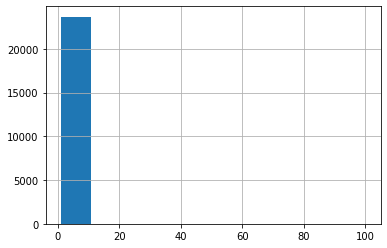

In [25]:
# 4. Find and eliminate rare and erratic values.

# Let's define the knockout values in the "ceiling height" column:
data['ceiling_height'].hist()
print(data['ceiling_height'].min())
print(data['ceiling_height'].max()) 

Conclusion: in the "ceiling height" column, the values range from 1 to 100m.

In [26]:
# Let's look at the unique values in the "ceiling height" column:
data['ceiling_height'].sort_values().unique()
data['ceiling_height'].value_counts()

2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

According to paragraph 5.8 of SNiP 31-01-2003 "Residential multi-apartment buildings",
the ceiling height in residential premises should be at least 2.7 m. Taking into account that
there are about 4000 apartments with a ceiling height of 2.5 meters in the dataframe and it is not desirable to lose them from the dataframe or somehow adjust their parameters, the values in the column "ceiling height" less than 2.5 meters will be replaced by 2.5 meters.
The main spread of values is 2.65 meters (9871 values). We can assume that this is the standard height of one floor for apartments from the dataframe. Taking into account that there are values of more than 5 meters in the dataframe, which apparently imply the height of the ceiling in a two-story apartment, values of more than 5.3 meters (2.65 meters * 2 floors) will be replaced by 5.3 meters. The option of dividing the area by 10 proposed in the condition does not seem appropriate, because it is not clear from what value it is worth dividing by 10, and what to do with the value, for example, 100m.

In [27]:
# Let's restore the correct values of the "ceiling height" column: 
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height'] > 5.3, 'ceiling_height'] = 5.3
print(data['ceiling_height'].sort_values().unique())

[2.5  2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63
 2.64 2.65 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77
 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91
 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05
 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.2
 3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32 3.33 3.34
 3.35 3.36 3.37 3.38 3.39 3.4  3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49
 3.5  3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.62 3.63 3.65
 3.66 3.67 3.68 3.69 3.7  3.75 3.76 3.78 3.8  3.82 3.83 3.84 3.85 3.86
 3.87 3.88 3.9  3.93 3.95 3.98 4.   4.06 4.1  4.14 4.15 4.19 4.2  4.25
 4.3  4.37 4.4  4.45 4.5  4.65 4.7  4.8  4.9  5.   5.2  5.3 ]


Conclusion: the spread of values in the "ceiling height" column now varies from 2.5 to 5.3 meters.

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.785766,9.0,False,...,27.848168,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
51,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.000000,4.0,False,...,50.000000,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
121,20,33000000.0,180.0,2017-02-17,3,2.90,9,86.000000,8.0,False,...,24.000000,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.000000,3.0,False,...,55.521189,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
262,14,37500000.0,158.0,2019-01-24,4,2.65,12,88.000000,4.0,False,...,40.000000,0,Санкт-Петербург,25799.0,4593.0,0.0,NaN,2.0,840.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4,181.800000,2.0,False,...,21.900000,0,Санкт-Петербург,20630.0,1229.0,3.0,189.0,3.0,40.0,42.0
23091,20,33000000.0,186.0,2017-10-11,3,3.00,5,130.000000,3.0,False,...,16.000000,1,Санкт-Петербург,24785.0,3359.0,0.0,NaN,0.0,NaN,138.0
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4,82.400000,4.0,False,...,40.100000,0,Санкт-Петербург,37268.0,15419.0,0.0,NaN,0.0,NaN,NaN
23395,4,40000000.0,188.0,2017-05-29,6,2.65,6,109.510000,4.0,False,...,31.300000,0,Санкт-Петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,30.0


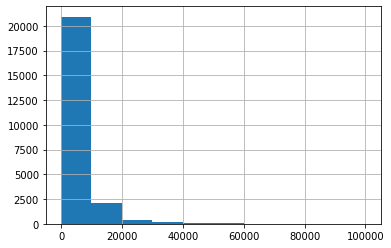

In [28]:
# Let's define the outlier values in the "apartment price" column:
print(data['last_price'].sort_values())
display(data.loc[(data['last_price'] > 30000000)])
(data['last_price']/1000).hist(range = (0, 100000))

In the column "apartment price" there is one outstanding value in the amount of 12,190 rubles, while the area of this apartment is 109 sq.m. Also, apartments with a price of more than 30 million rubles can be considered outstanding, there are 316 such units.

In [29]:
# Let's remove the out-of-place value in the "price" column in the amount of 12190 rubles.: 
data = data.loc[data['last_price'] != 12190.00]
data['last_price'].min() 

430000.0

In [30]:
# We will remove apartments with a price of more than 30 million rubles from the dataframe.:
data = data.loc[data['last_price'] <= 30000000]
print(data['last_price'].max())
data.info()

30000000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23382 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23382 non-null  int64         
 1   last_price            23382 non-null  float64       
 2   total_area            23382 non-null  float64       
 3   first_day_exposition  23382 non-null  datetime64[ns]
 4   rooms                 23382 non-null  int64         
 5   ceiling_height        23382 non-null  float64       
 6   floors_total          23382 non-null  int64         
 7   living_area           23382 non-null  float64       
 8   floor                 23382 non-null  float64       
 9   is_apartment          23382 non-null  bool          
 10  studio                23382 non-null  bool          
 11  open_plan             23382 non-null  bool          
 12  kitchen_area          23382 non-null  float64       
 13  balco

After removing the missing values in the "apartment price" column, the minimum price for an apartment in the dataframe is 430,000 rubles, the maximum is 30,000,000 rubles.

In [31]:
# Let's define the knockout values in the "number of rooms" column:
print(data['rooms'].value_counts())

1     8042
2     7918
3     5717
4     1108
5      266
0      196
6       78
7       38
8        7
9        6
14       2
10       2
11       1
16       1
Name: rooms, dtype: int64


Conclusion: in the "number of rooms" column, 196 apartments have the number of rooms equal to 0. Also, there is a small number of apartments with more than 5 rooms in the dataframe, these values can also be considered out of order.

In [32]:
# Replace the number of rooms from 0 to 1 by apartments, where the number of rooms is 0:
data['rooms'] = data['rooms'].replace(0, 1)
print(data['rooms'].value_counts())

1     8238
2     7918
3     5717
4     1108
5      266
6       78
7       38
8        7
9        6
14       2
10       2
11       1
16       1
Name: rooms, dtype: int64


In [33]:
# Let's drop from the dataframe lines with apartments, the number of rooms of which is more than 5:
data = data.loc[data['rooms'] <= 5]
print(data['rooms'].value_counts())

1    8238
2    7918
3    5717
4    1108
5     266
Name: rooms, dtype: int64


Conclusion: the number of rooms in apartments in the dataframe is between 1 and 5 rooms.

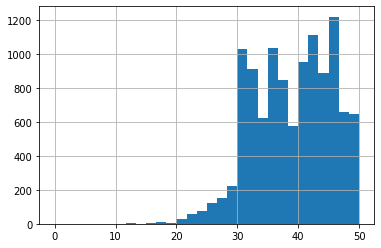

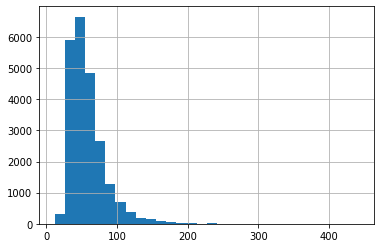

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
521,20,25717300.0,230.10,2015-01-21,3,2.65,3,130.000000,1.0,False,...,26.100000,1,Пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0
1187,10,25000000.0,201.00,2015-08-07,5,3.50,6,131.000000,4.0,False,...,35.000000,0,Санкт-Петербург,26752.0,5458.0,3.0,445.0,0.0,NaN,1117.0
2003,23,21000000.0,215.00,2017-11-11,4,2.65,5,55.000000,2.0,False,...,17.000000,0,Красное Село,24842.0,28266.0,1.0,311.0,1.0,1009.0,14.0
2176,3,25800000.0,204.00,2017-02-15,5,3.95,5,121.000000,2.0,False,...,19.000000,0,Санкт-Петербург,26457.0,5305.0,2.0,132.0,1.0,734.0,423.0
2489,9,12500000.0,255.00,2017-04-21,3,2.65,2,153.900000,2.0,False,...,100.700000,0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
3267,1,25092624.0,266.20,2015-12-08,5,3.00,3,155.100000,1.0,False,...,11.600000,0,Санкт-Петербург,32106.0,5065.0,0.0,NaN,2.0,471.0,660.0
3303,20,15750000.0,214.00,2018-06-15,4,2.65,17,159.200000,17.0,False,...,40.000000,0,Сестрорецк,56588.0,33517.0,0.0,NaN,1.0,703.0,264.0
3676,12,28789000.0,441.98,2019-01-23,4,2.65,6,252.361592,6.0,False,...,35.050000,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4536,25,26000000.0,290.00,2017-11-16,5,2.80,17,141.000000,16.0,False,...,45.000000,0,Санкт-Петербург,30094.0,5608.0,0.0,NaN,1.0,153.0,120.0
4549,1,28000000.0,211.00,2016-03-17,5,4.00,5,153.000000,2.0,False,...,15.000000,0,Санкт-Петербург,21766.0,2067.0,1.0,692.0,1.0,51.0,266.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
716,5,1500000.0,17.00,2017-06-07,1,2.70,9,12.000000,1.0,False,...,2.977477,0,Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.000000,2.0,False,...,3.152623,0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
5855,3,945750.0,19.50,2017-09-18,1,2.76,3,12.700000,2.0,False,...,3.415341,0,Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6084,6,770000.0,18.00,2017-10-16,1,2.65,5,13.000000,4.0,False,...,3.000000,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0
8454,7,2250000.0,19.00,2019-03-12,1,3.00,6,10.848614,2.0,False,...,3.327768,0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3,14.000000,3.0,False,...,2.400000,0,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
8755,1,1350000.0,18.80,2017-11-22,1,2.75,19,15.800000,1.0,False,...,3.292739,0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
8886,10,2450000.0,15.50,2018-08-22,1,2.65,5,10.000000,2.0,False,...,2.714758,0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9157,0,3400000.0,17.60,2018-03-18,1,2.65,5,15.000000,2.0,False,...,3.082564,0,Санкт-Петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117.0
9412,5,2100000.0,16.00,2017-12-10,1,2.65,6,13.000000,1.0,False,...,2.802331,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


In [34]:
# Let's define the knockout values in the "total area" column:
data['total_area'].hist(bins=30, range=(0,50))
plt.show()
data['total_area'].hist(bins=30)
plt.show()
display(data.loc[data['total_area'] > 200])
display(data.loc[data['total_area'] < 20])

Conclusion: abnormal values in the "apartment area" column can be considered values of more than 200 sq.m, there are 41 such apartments, as well as values of less than 20 sq.m, there are 27 such apartments.

In [35]:
# Let's drop lines with apartments with an area of more than 200 sq.m from the dataframe:
data = data.loc[data['total_area'] <= 200]
print(data['total_area'].max())

200.0


Conclusion: after removing the missing values in the "apartment area" column, the maximum area is 200 sq.m.

In [36]:
# Let's drop lines with apartments with an area of less than 20 sq.m from the dataframe:
data = data.loc[data['total_area'] >= 20]
print(data['total_area'].min())

20.0


Conclusion: after removing the missing values in the "apartment area" column, the minimum area is 20 sq.m.

### Calculate and add new columns to the table

In [38]:
# Create a column "price of 1 sq. meter":
data['price_1m'] = data['last_price']/data['total_area']
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8.0,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1.0,False,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4.0,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13.0,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5.0,False,...,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6.0,False,...,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.882144,22.0,False,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26.0,False,...,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7.0,False,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3.0,False,...,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525


In [39]:
# Create columns "day of the week", "month", "year" of the ad publication:
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8.0,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,7,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1.0,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,4,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4.0,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13.0,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5.0,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,10,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6.0,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,2,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.882144,22.0,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,18,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26.0,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,23,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7.0,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,26,2,2017
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3.0,False,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,16,11,2017


In [40]:
# Create a column "apartment floor type":
def floor_type(row):
    if row['floor'] == 1:
        return('первый')
    if row['floor'] == row['floors_total']:
        return('последний')
    else:
        return('другой')
data['floor_type'] = data.apply(floor_type, axis = 1)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8.0,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1.0,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4.0,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13.0,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5.0,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6.0,False,...,0.0,NaN,0.0,NaN,155.0,99195.710456,2,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.882144,22.0,False,...,0.0,NaN,0.0,NaN,NaN,110544.692737,18,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26.0,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,23,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7.0,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,26,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3.0,False,...,1.0,310.0,2.0,553.0,137.0,127525.252525,16,11,2017,другой


In [41]:
# Create a column "distance to the city center in km":
data['center_km'] = round(data['cityCenters_nearest']/1000)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_exposition,month_exposition,year_exposition,floor_type,center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8.0,False,...,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1.0,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4.0,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13.0,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5.0,False,...,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6.0,False,...,NaN,0.0,NaN,155.0,99195.710456,2,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.882144,22.0,False,...,NaN,0.0,NaN,NaN,110544.692737,18,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26.0,False,...,NaN,NaN,NaN,189.0,87454.764777,23,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7.0,False,...,NaN,0.0,NaN,289.0,88524.590164,26,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3.0,False,...,310.0,2.0,553.0,137.0,127525.252525,16,11,2017,другой,14.0


Conclusion: New columns have been added to the dataframe, in particular, data on the price per 1 square meter for each object, the day, month and year of publication of ads, the distance to the center in kilometers, the type of apartment floor.

### Conduct a research analysis of the data

In [42]:
# 1. Examine the following object parameters: 
# Let's build histograms for the following parameters of objects:


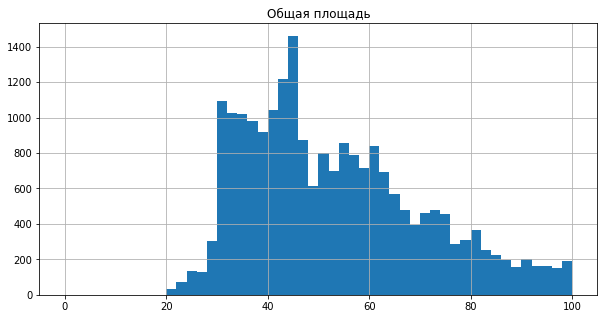

In [43]:
# Total area:
plt.title('Total area:')
data['total_area'].hist(bins = 50, figsize = (10,5), range = (0,100))
plt.show()

Conclusion: the bulk of the values in the "apartment area" column are distributed in the range from 10 to 300m, the main spread of values is between 30 and 60m, most of all apartments with an area of approximately 45 sq.m.

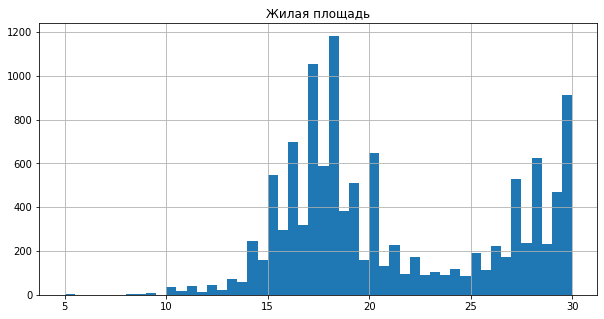

In [44]:
# Living area:
plt.title('Living area')
data['living_area'].hist(bins = 50, figsize = (10,5), range = (5,30))
plt.show()

Conclusion: the bulk of the values in the "living area" column are distributed in the range from 5 to 200 sq.m, the main spread of values is between 12 and 50 sq.m, most apartments with a living area of about 17 sq.m, there are two peaks of areas - 17 and 30 sq.m.

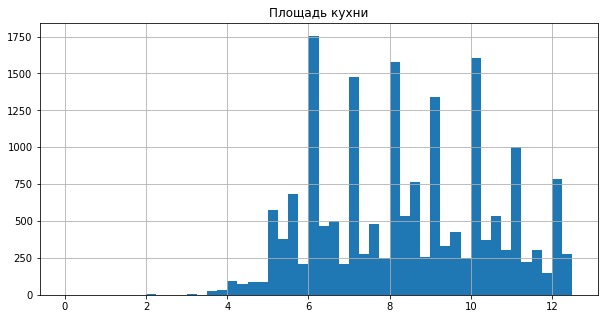

In [45]:
# Kitchen area:
plt.title('Kitchen area')
data['kitchen_area'].hist(bins = 50, figsize = (10,5), range = (0,12.5))
plt.show()

Conclusion: the bulk of the values in the "kitchen area" column are distributed in the range from 2 to 40 m, the main spread of values is between 5 and 12.5 m, there are several peaks of areas: 6, 7, 8, 9, 10m. The presence of such peaks is probably due to the rounding of the areas.

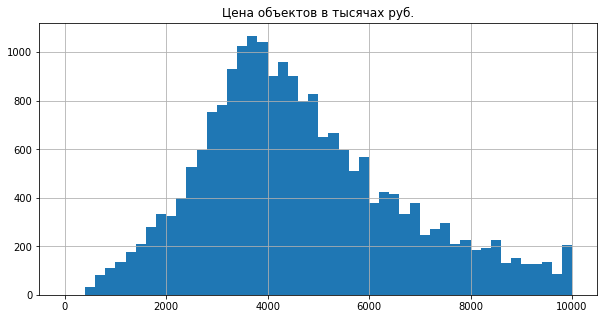

In [46]:
# The price of objects in thousands of rubles:
# For the correct display of the histogram, we divide the values of the "price" column by 1000,
# the total values will be given in thousands of rubles.
data['last_price_tisha'] = data['last_price']/1000
plt.title('The price of objects in thousands of rubles.')
data['last_price_tisha'].hist(bins = 50, figsize = (10,5), range = (0, 10000))
plt.show()

Conclusion: the bulk of the values in the "price" column are distributed in the range from 500 thousand to 40 million rubles, the main spread of values is between 2 and 6 million rubles, most of all apartments with a price from 3.5 to 4 million rubles.

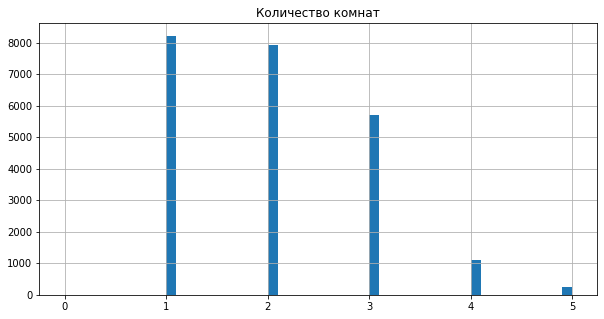

In [47]:
# Number of rooms:
plt.title('Number of rooms')
data['rooms'].hist(bins = 50, figsize = (10,5), range = (0,5))
plt.show()

Conclusion: the bulk of the values in the "number of rooms" column are distributed in the range from 1 to 5, most of all apartments with 1, 2 and 3 rooms.

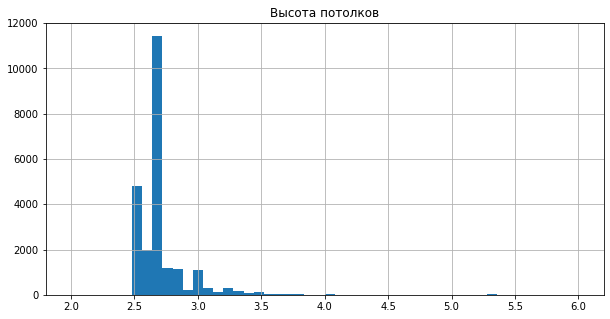

In [48]:
# Ceiling height:
plt.title('Ceiling height')
data['ceiling_height'].hist(bins = 50, figsize = (10,5), range = (2, 6))
plt.show()

Conclusion: the bulk of the values in the "ceiling height" column are distributed in the range from 2.5 to 3.5, most of the apartments with a ceiling height of 2.65m.

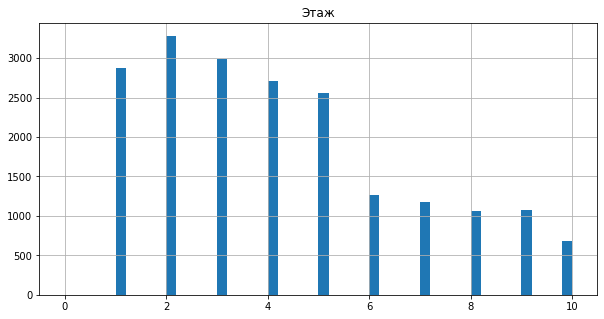

In [49]:
# Floor:
plt.title('Floor')
data['floor'].hist(bins = 50, figsize = (10,5), range = (0, 10))
plt.show()

Conclusion: the bulk of the values in the "floor" column are distributed in the range from 1 to 30, the main spread of values is between the 1st and 5th floors, most of the apartments are on the 2nd floor.

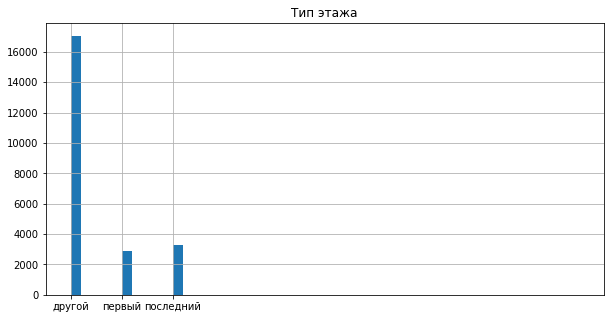

In [50]:
# Floor type:
plt.title('Floor type')
data['floor_type'].hist(bins = 50, figsize = (10,5), range = (0, 10))
plt.show()

Conclusion: according to the data from the "floor type" column, most apartments have neither the first nor the last floor, there are slightly more apartments on the last floor than on the first.

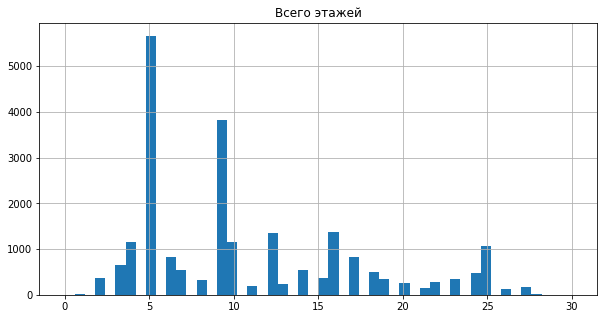

In [51]:
# Total floors:
plt.title('Total floors')
data['floors_total'].hist(bins = 50, figsize = (10,5), range = (0, 30))
plt.show()

Conclusion: the bulk of the values in the "total floors" column are distributed in the range from 1 to 30, there are two peaks of storeys with 5 and 10 floors.

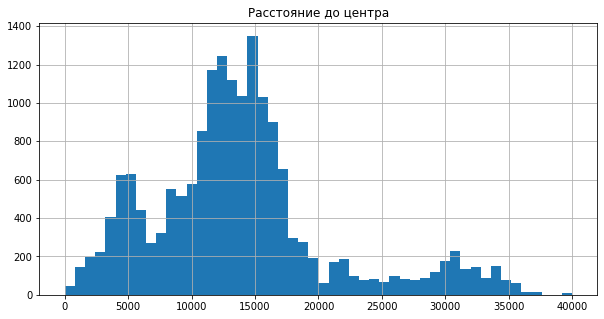

In [52]:
# Distance to the center:
plt.title('Distance to the center')
data['cityCenters_nearest'].hist(bins = 50, figsize = (10,5), range = (0, 40000))
plt.show()

Conclusion: the bulk of the values in the "distance to the center" column are distributed in the range from 0 to 35 km, the main spread of values is between 2.5 and 17 km, the peak of values is 15 km.

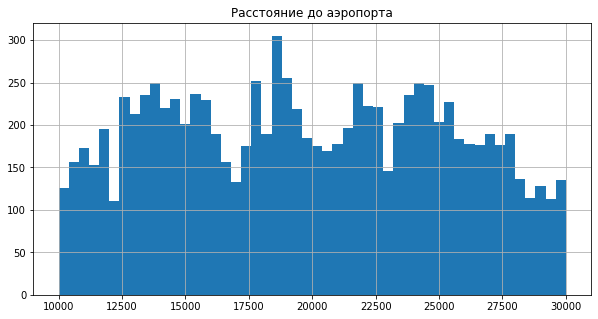

In [53]:
# Distance to the airport:
plt.title('Distance to the airport')
data['airports_nearest'].hist(bins = 50, figsize = (10,5), range = (10000, 30000))
plt.show()

Conclusion: the bulk of the values in the "distance to the airport" column are distributed in the range from 6 to 60 km, the main spread of values is between 10 and 50 km, the peak of values is approximately 18.5 km.

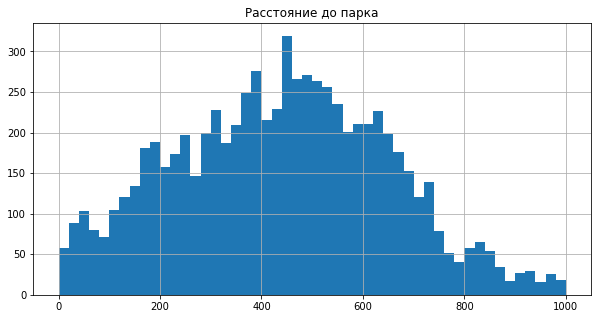

In [54]:
# Distance to the park:
plt.title('Distance to the park')
data['parks_nearest'].hist(bins = 50, figsize = (10,5), range = (0, 1000))
plt.show()

Conclusion: the bulk of the values in the "distance to the park" column are distributed in the range from 0 to 2 km, the main spread of values is between 200 and 700 m, the peak of values is approximately 450 m.

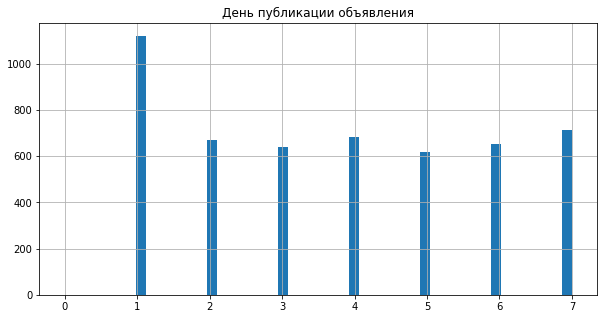

In [55]:
# Day of publication of the announcement:
plt.title('Day of publication of the announcement')
data['day_exposition'].hist(bins = 50, figsize = (10,5), range = (0, 7))
plt.show()

Conclusion: in the column "ad placement day", the distribution by day is approximately uniform, the peak of placement falls on Monday.

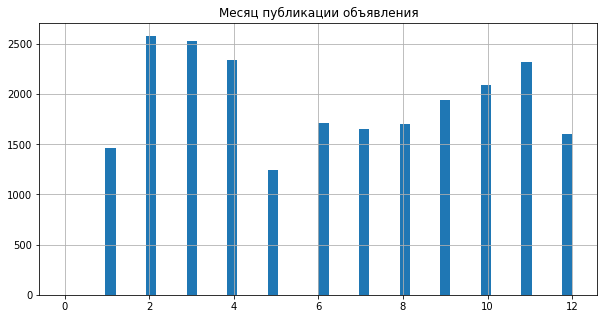

In [56]:
# Month of publication of the ad:
plt.title('Month of publication of the ad')
data['month_exposition'].hist(bins = 50, figsize = (10,5), range = (0, 12))
plt.show()

Conclusion: from the column "month of placement of ads" it follows that the most ads are placed in February, March, April and in the autumn months, the least - in May, December and January.

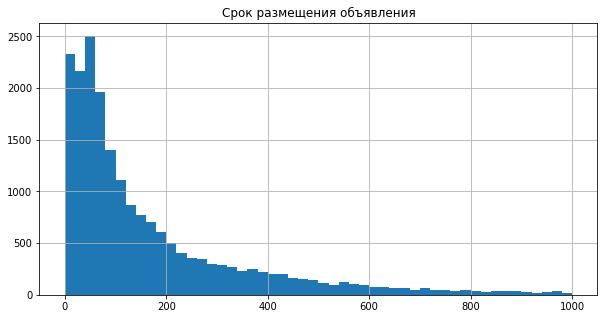

178.8778197356653
94.0


In [57]:
# 2. Study how quickly apartments were sold (days_exposition column).
plt.title('Study how quickly apartments were sold (days_exposition column).')
data['days_exposition'].hist(bins = 50, figsize = (10,5), range = (0,1000))
plt.show()
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

Conclusion: In most cases, apartments are sold within six months (200 days on the chart).
The sale can be considered fast for 3 months, long - from 0.5 to 1.5 years,
unreasonably long - from 1.5 to 2.5 years.

AxesSubplot(0.125,0.125;0.775x0.755)
0.7823415830675213


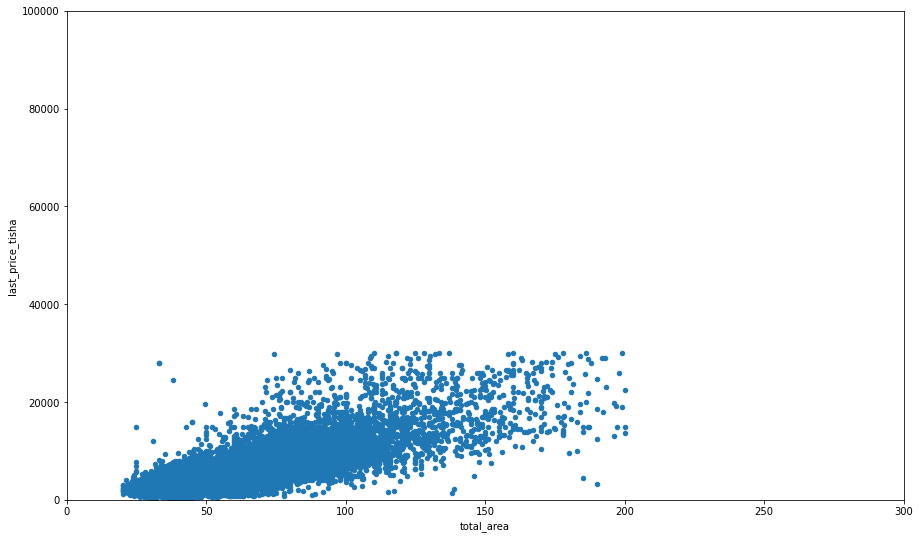

In [58]:
# 3. What factors most affect the total (total) cost of the object?

# Let's build a scattering diagram and determine the correlation coefficient, showing
# the dependence of the price on the total area of the apartment.
# Here and further along the Y axis we will take the price values in thousand rubles.:
print(data.plot(x='total_area', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(0, 300), 
ylim=(0, 100000)))
print(data['total_area'].corr(data['last_price_tisha']))

Conclusion: the price of an apartment directly correlates with the total area of the apartment, the correlation coefficient is approximately 0.65.

AxesSubplot(0.125,0.125;0.775x0.755)
0.6725242990698242


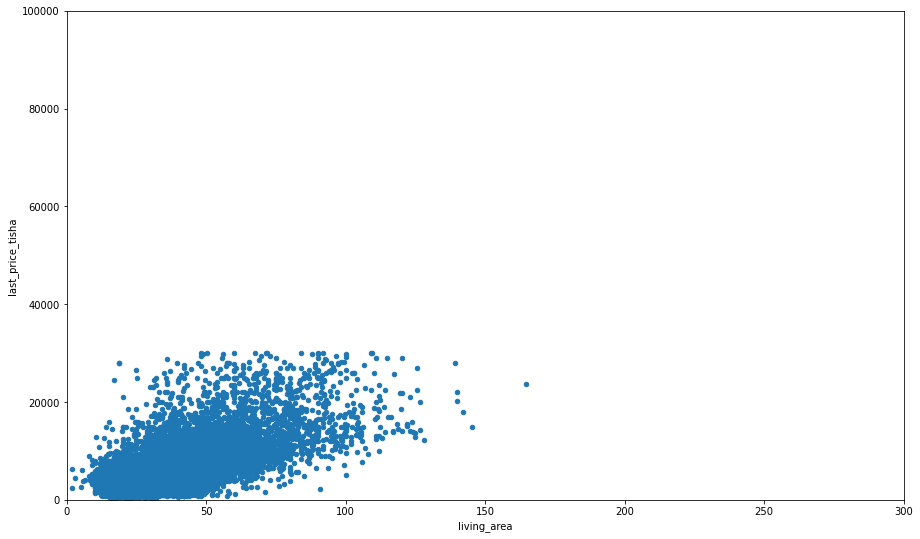

In [59]:
# Let's build a scattering diagram and determine the correlation coefficient
# showing the dependence of the price on the living area of the apartment:
print(data.plot(x='living_area', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(0, 300), 
ylim=(0, 100000)))
print(data['living_area'].corr(data['last_price_tisha']))

Conclusion: the price of an apartment directly correlates with the living area of the apartment, the correlation coefficient is approximately 0.59.

AxesSubplot(0.125,0.125;0.775x0.755)
0.616304369196933


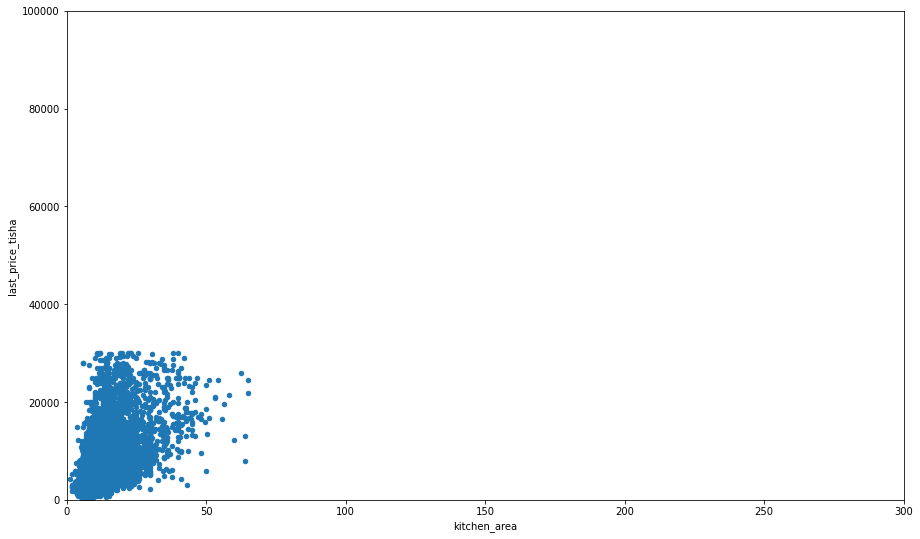

In [60]:
# Let's build a scattering diagram and determine the correlation coefficient showing
# the dependence of the price on the kitchen area in the apartment:
print(data.plot(x='kitchen_area', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(0, 300), 
ylim=(0, 100000)))
print(data['last_price_tisha'].corr(data['kitchen_area']))

Conclusion: the price of an apartment directly correlates with the kitchen area, the correlation coefficient is approximately 0.51

AxesSubplot(0.125,0.125;0.775x0.755)
0.47983707194229086


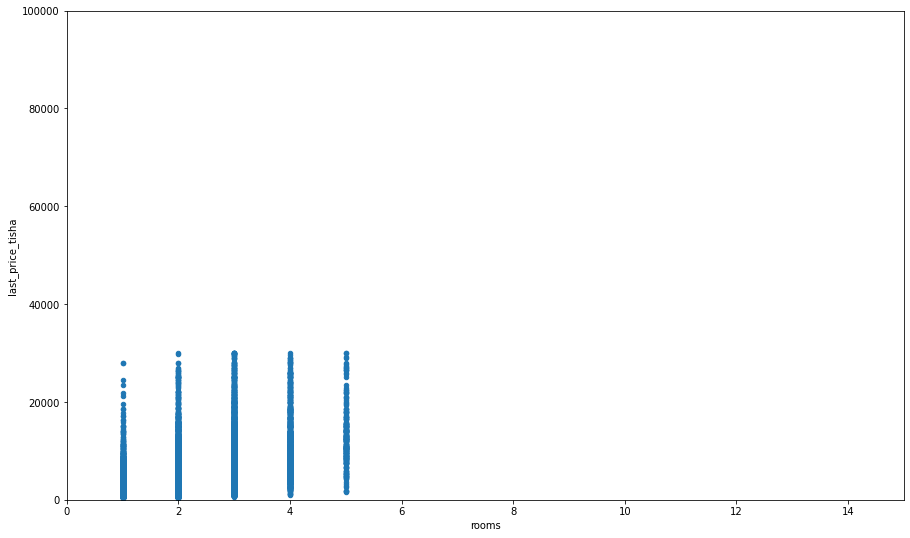

In [61]:
# Let's build a scattering diagram and determine the correlation coefficient, showing
# the dependence of the price on the number of rooms:
print(data.plot(x='rooms', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(0, 15), 
ylim=(0, 100000)))
print(data['last_price_tisha'].corr(data['rooms']))

Conclusion: the highest prices for apartments are typical for 3-5-room apartments, most likely due to the fact that there are most of them in the dataframe. The correlation coefficient is 0.36.

AxesSubplot(0.125,0.125;0.775x0.755)


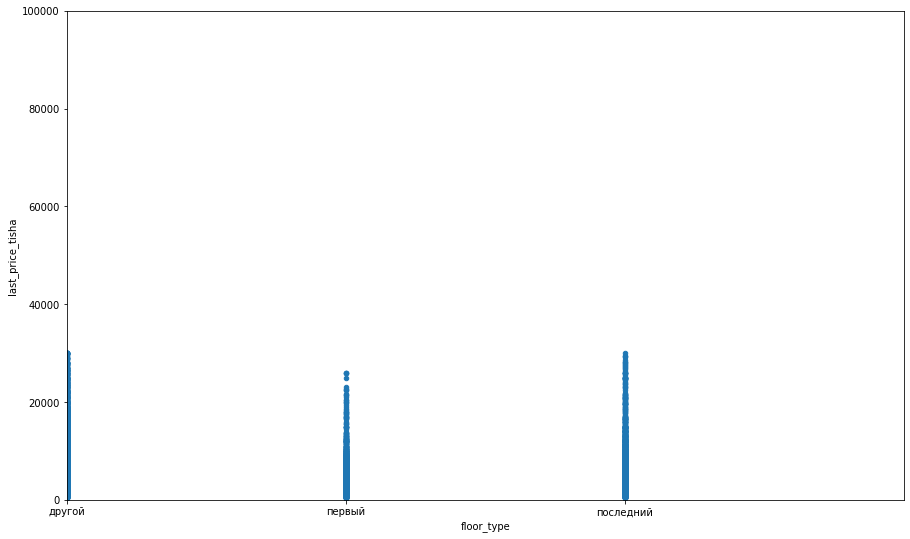

In [62]:
# Let's build a scattering diagram showing the dependence of the price on the floor:
print(data.plot(x='floor_type', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(0, 3), 
ylim=(0, 100000)))

Conclusion: regarding the number of floors, the highest prices are observed for apartments not on the first and last floors. Prices for apartments on the ground floor are the lowest and noticeably inferior, including apartments on the top floor.

AxesSubplot(0.125,0.125;0.775x0.755)


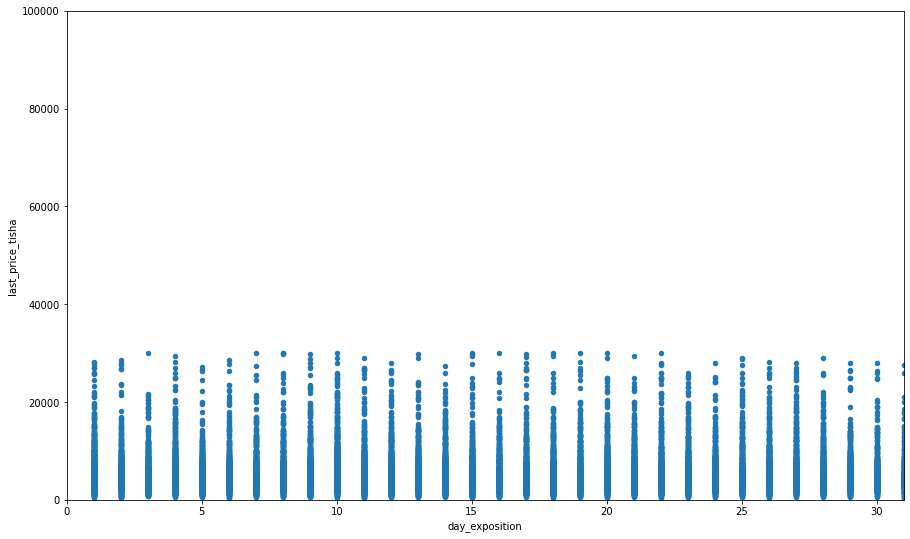

In [63]:
# Let's build a scatter diagram showing the dependence of the price on the day of the ad placement:
print(data.plot(x='day_exposition', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(0, 31), 
ylim=(0, 100000)))

Conclusion: it is difficult to trace the correlation between the price and the day of the ad placement.

AxesSubplot(0.125,0.125;0.775x0.755)


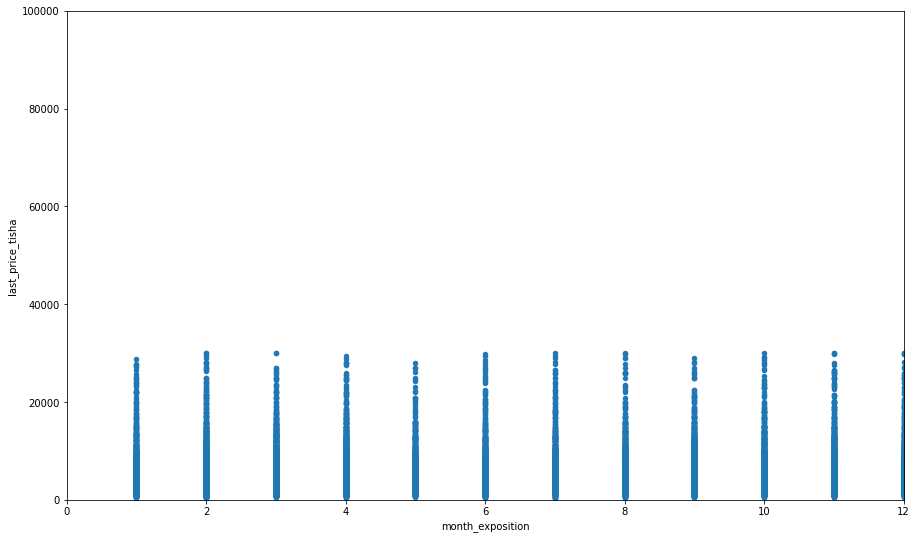

In [64]:
# Let's build a scatter diagram showing the dependence of the price on the month of placement of the ad:
print(data.plot(x='month_exposition', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(0, 12), 
ylim=(0, 100000)))

Conclusion: it is difficult to trace the correlation between the price and the month of ad placement.

AxesSubplot(0.125,0.125;0.775x0.755)


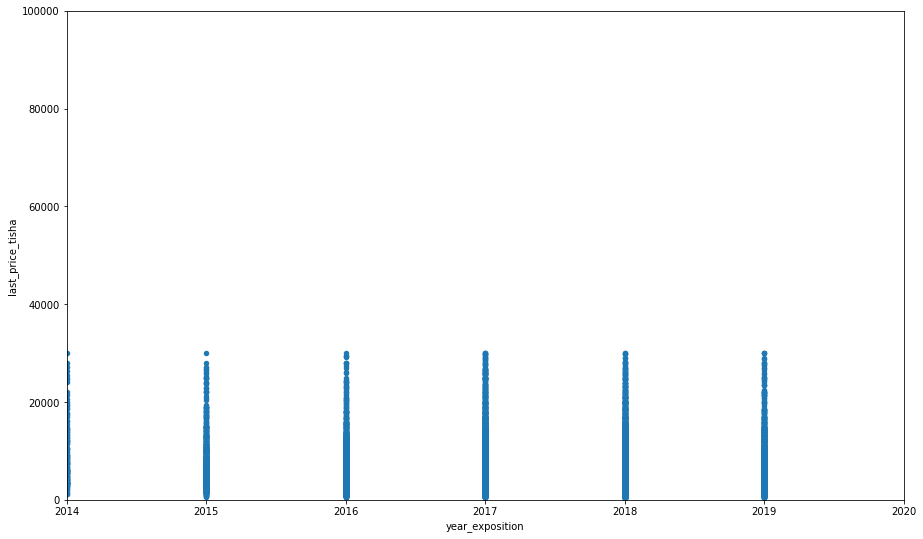

In [65]:
# Let's build a scatter diagram showing the dependence of the price on the year of placement of the ad:
print(data.plot(x='year_exposition', y='last_price_tisha', kind='scatter', figsize=(15, 9), xlim=(2014, 2020), 
ylim=(0, 100000)))

Conclusion: in relation to the year of placement of ads, the peak of prices is observed in 2017, after which the fall in real estate prices began.

In [66]:
# 4. Calculate the average price per square meter in 10 localities with the largest number of ads.
kolich_obyav = data.groupby('locality_name')['locality_name'].count()
sred_cena = data.groupby('locality_name')['price_1m'].mean()
final = kolich_obyav.to_frame().join(sred_cena)
final.columns = ['count', 'price_1m_sred']
display(final.sort_values(by = 'count', ascending = False).head(10))

,count,price_1m_sred
locality_name,,
Санкт-Петербург,15227,110670.356087
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,439,78655.592167
Всеволожск,398,68654.473986
Пушкин,362,103168.298281
Колпино,337,75333.295801
Парголово,326,90332.263023
Гатчина,307,68746.146763


Conclusion: most of the ads are placed in St. Petersburg, Murino and Kudrovo. Of the three mentioned localities, leading in the number of ads, the highest average cost of 1 sq.m in St. Petersburg.

In [67]:
# Let's highlight the localities with the highest and lowest cost per square meter:
print(data.groupby('locality_name')['price_1m'].mean().sort_values().head(10))
print(data.groupby('locality_name')['price_1m'].mean().sort_values(ascending = False).head(10))

locality_name
Старополье         11206.221198
Свирь              11481.481481
Вахнова Кара       11688.311688
Выскатка           12335.480902
Совхозный          12629.129129
Малая Романовка    12724.550898
Тёсово-4           12931.034483
Бор                13157.894737
Сижно              13709.677419
Ям-Тесово          13711.553373
Name: price_1m, dtype: float64
locality_name
Зеленогорск        115122.799198
Санкт-Петербург    110670.356087
Репино             104238.614786
Пушкин             103168.298281
Сестрорецк         101912.339326
Лисий Нос          100660.814239
Мистолово           98549.976709
Левашово            96997.690531
Кудрово             95324.930544
Парголово           90332.263023
Name: price_1m, dtype: float64


Conclusion: Of all settlements, the highest cost of 1 square meter is in Zelenogorsk, the lowest is in Staropolye, St. Petersburg is in second place.

In [68]:
# 5. Select apartments in St. Petersburg using the locality_name column
# and calculate the average price of each kilometer.
print(data.loc[data['locality_name'] == "Санкт-Петербург"].pivot_table(index='center_km',
values='last_price_tisha', aggfunc='mean'))

           last_price_tisha
center_km                  
0.0            11318.666667
1.0            11618.819870
2.0            10755.138996
3.0             9464.499539
4.0            10063.652423
5.0            10590.820469
6.0             9402.785034
7.0             9272.221383
8.0             8769.248009
9.0             6772.331085
10.0            6345.510011
11.0            6075.248955
12.0            5780.173300
13.0            6049.095831
14.0            5589.388146
15.0            5784.618951
16.0            5351.793776
17.0            5199.449684
18.0            4868.168508
19.0            5037.674936
20.0            5951.464837
21.0            5493.469368
22.0            5415.524282
23.0            4689.843373
24.0            3854.429615
25.0            4052.839923
26.0            3973.012509
27.0            8300.000000
28.0            5026.428571
29.0            4236.666667


Conclusion: the price of 1 km falls as you move away from the center of St. Petersburg. The price of apartments as they move away from the city center falls from an average of 31.5 million to 4.2 million rubles, i.e. almost 8 times.

### General conclusion

The project considers the archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. The dataframe has 22 columns and 23699 rows.
1. The following work was carried out at the preprocessing stage:
- In a number of columns, the missing values have been replaced, in particular, in the columns "ceiling height", "number of floors", "living area" and "kitchen area", the missing values are filled with average values, in the column "number of balconies", the omissions are replaced by zero, in the column "apartment", the omissions are replaced by False (i.e. they are not apartments), omissions were not replaced in columns with cartographic data in order to avoid data distortion;
- To avoid further errors, data types have been replaced in some columns. In particular, in columns with quantitative indicators, where possible, the float data type is replaced by int, and in the column "date of ad placement" the data type is replaced by datetime;
- Implicit duplicates have been eliminated in the column with the names of localities, so that in the future there will be no errors when calculating the average price of real estate objects by localities;
- In the "ceiling height" column, outlier values have been eliminated. In particular, in apartments with a ceiling height of less than 2.5 meters, the height is assumed to be 2.5 meters, and in apartments with a ceiling height of more than 5.3 meters, the height is assumed to be 5.3 meters. 
- In the "apartment price" column, the knockout value of 12190 rubles was removed, as well as apartments with a price of more than 30 million rubles;
- In the "number of rooms" column, zero values were replaced by one, apartments with more than 5 rooms were also discarded.;
- In the "apartment area" column, apartments with an area of less than 20 sq.m and more than 200 sq.m are discarded;
- For more detailed data analysis, new columns have been added to the dataframe, in particular, data on the price per 1 sq.m for each object, the day, month and year of publication of ads, the distance to the center in kilometers, type of apartment floor.
2. As part of the research data analysis, it was revealed:
- The dataframe has the most apartments with an area of 45 sq.m with a living area of 17 sq.m and a kitchen area from 6 to 10 sq.m.
- Most of the apartments have 1, 2 or 3 rooms, the ceiling height is 2.65 meters, located on the 2nd floor, the peak number of floors in the houses is on the 5th and 10th floors.
- On average, the apartments are located 15 km from the city center .Saint Petersburg, 18.5 km from the airport, the average distance to the nearest park is 450 meters.
- Most sales announcements are placed on Mondays in February, March, April and in the autumn months, the least - in May, December and January. In most cases, apartments are sold within six months, less often - from six months to one and a half years.
3. In terms of pricing revealed:
- On average, apartments are estimated in the amount of 3.5 to 4 million rubles. 
- The price of the apartment directly correlates with the total area, living area and kitchen area. 
- During the observation period from 2014 to 2019, the peak of prices occurred in 2017, the correlation between the price and the day or month of the ad placement is difficult to trace.
- The highest average cost per square meter was found in Zelenogorsk, in second place - St. Petersburg, the lowest - in Staropolye. 
- InSt. Petersburg the cost of apartments directly correlates with the distance from the center, in particular, the average price per square meter drops by about 8 times as you move away from the center by a maximum of 29 km.

